In [ ]:
%matplotlib inline
from pylab import *
from sie.mcmc import StatsModel

In [ ]:
xy1="""
X	Y
10	8.04
8	6.95
13	7.58
9	8.81
11	8.33
14	9.96
6	7.24
4	4.26
12	10.84
7	4.82
5	5.68
"""
xy=xy1
x,y=array([_.split() for _ in xy.strip().split('\n')[1:]],dtype=float).T
x,y

(array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]),
 array([ 8.04,  6.95,  7.58,  8.81,  8.33,  9.96,  7.24,  4.26, 10.84,
         4.82,  5.68]))

In [ ]:
model=StatsModel()
model.add_data(x=x,y=y)
model.add("m ~ Normal(0,10)")
model.add("b ~ Normal(0,10)")
model.add("σ ~ Jeffreys()")
model.add("res ~ Normal(m*x+b-y,σ,sum=True)")
model.initialize()
model


Parameters
----------
    {'m': m, 'b': b, 'σ': σ, 'res': res}
Data
----
    ['x', 'y']
Prior
-----
    ['m ~ Normal(0,10)', 'b ~ Normal(0,10)', 'σ ~ Jeffreys()']
Likelihood
----------
    ['res ~ Normal(m*x+b-y,σ,sum=True)']
        

In [ ]:
print(model.make_func())

def _lnprior(θ,slices):
    m=θ[slices.m]
    b=θ[slices.b]
    σ=θ[slices.σ]

    _value=0

    _value+=Normal(0,10)(m)
    _value+=Normal(0,10)(b)
    _value+=Jeffreys()(σ)

    return _value


def _lnlikelihood(θ,data,slices):
    x=data['x']
    y=data['y']

    m=θ[slices.m]
    b=θ[slices.b]
    σ=θ[slices.σ]

    res=θ[slices.res]

    _value=0

    _value+=Normal(m*x+b-y,σ,sum=True)(res)

    return _value.sum()



Sampling Prior...
Done.
0.38 s
Running MCMC 1/3...
Done.
1.73 s
Samples
Running MCMC 2/3...
Done.
1.74 s
Samples
Running MCMC 3/3...
Done.
1.73 s
Samples
figsize [6.4, 16.0]


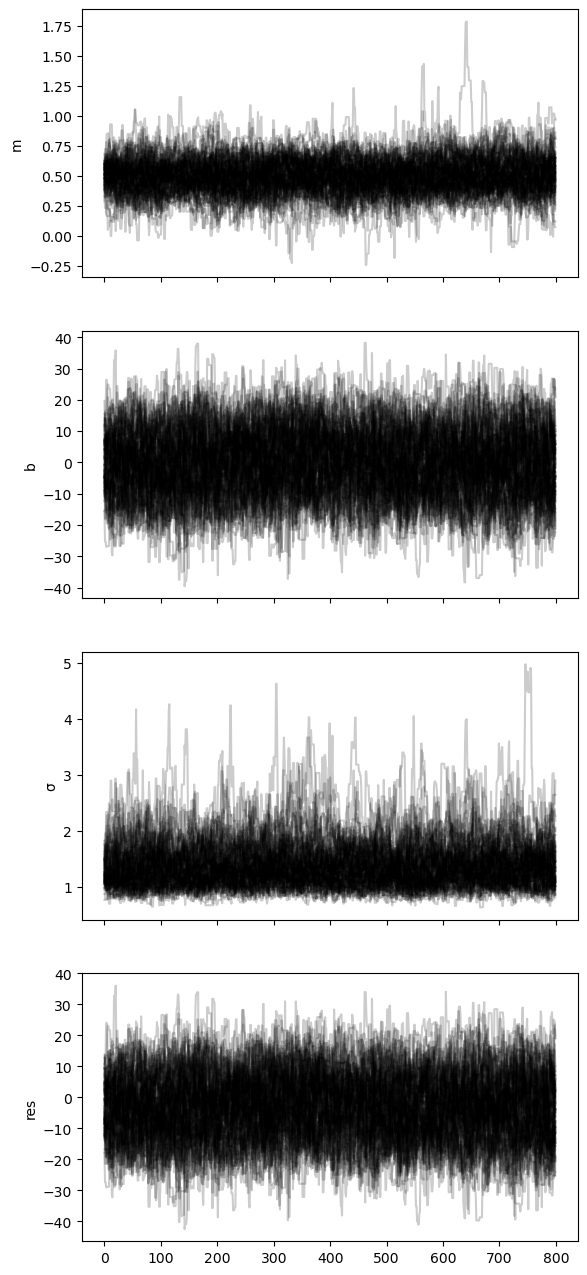

In [ ]:
model.run_mcmc(800,repeat=3)
model.plot_chains()

In [ ]:
self=model
args=[key for key in self.parameters if len(self.parameters[key])==1]
result={}
for key in args:
    s=self.slices.__getattribute__(key)
    sub_sample=self.samples[:,s]
    result[key]=np.percentile(sub_sample,[16,50,84],axis=0)

m (60000, 1)
b (60000, 1)
σ (60000, 1)
res (60000, 1)


In [ ]:
result

{'m': array([[0.37174672],
        [0.49668568],
        [0.62635622]]),
 'b': array([[-10.09882538],
        [  0.01721821],
        [  9.89799092]]),
 'σ': array([[1.03103565],
        [1.28866721],
        [1.64851296]]),
 'res': array([[-13.24065703],
        [ -2.94801192],
        [  7.03519211]])}

In [ ]:
model=StatsModel()
model.add_data(x=x,y=y)
model.add("m ~ Normal(0,10)")
model.add("b ~ Normal(0,10)")
model.add("σ ~ Jeffreys()")
model.add("res ~ Normal(m*x+b-y,σ)")   # this doesn't work yet
model.initialize()
model


Parameters
----------
    {'m': m, 'b': b, 'σ': σ, 'res': res}
Data
----
    ['x', 'y']
Prior
-----
    ['m ~ Normal(0,10)', 'b ~ Normal(0,10)', 'σ ~ Jeffreys()']
Likelihood
----------
    ['res ~ Normal(m*x+b-y,σ)']
        

In [ ]:
print(model.make_func())

def _lnprior(θ,slices):
    m=θ[slices.m]
    b=θ[slices.b]
    σ=θ[slices.σ]

    _value=0

    _value+=Normal(0,10)(m)
    _value+=Normal(0,10)(b)
    _value+=Jeffreys()(σ)

    return _value


def _lnlikelihood(θ,data,slices):
    x=data['x']
    y=data['y']

    m=θ[slices.m]
    b=θ[slices.b]
    σ=θ[slices.σ]

    res=θ[slices.res]

    _value=0

    _value+=Normal(m*x+b-y,σ)(res)

    return _value.sum()



Sampling Prior...
Done.
0.35 s
Running MCMC 1/3...
Done.
1.65 s
Samples
Running MCMC 2/3...
Done.
1.66 s
Samples
Running MCMC 3/3...
Done.
1.66 s
Samples
figsize [6.4, 12.0]


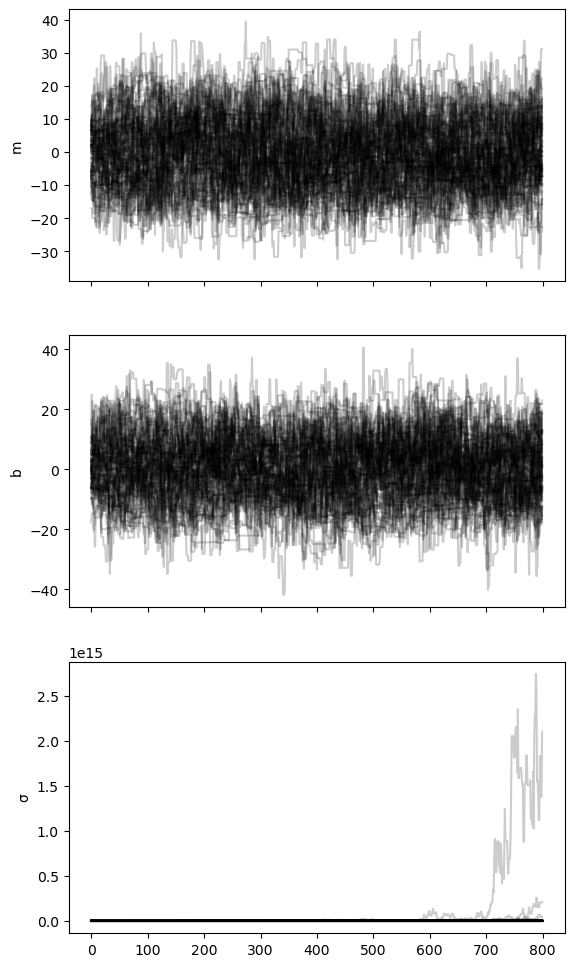

In [ ]:
model.run_mcmc(800,repeat=3)
model.plot_chains()